In [1]:
#Nous allons importer nos librairies : 
import pandas as pd
import numpy as np

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

import seaborn as sns

In [2]:
#On 'charge' seaborn : 
sns.set()

In [3]:
decathlon = pd.read_table("decathlon.txt",header=0)
decathlon.head()


,100m,Long.jump,Shot.put,High.jump,400m,110m.hurdle,Discus,Pole.vault,Javeline,1500m,Rank,Points,Competition
SEBRLE,11.04,7.58,14.83,2.07,49.81,14.69,43.75,5.02,63.19,291.7,1,8217,Decastar
CLAY,10.76,7.40,14.26,1.86,49.37,14.05,50.72,4.92,60.15,301.5,2,8122,Decastar
KARPOV,11.02,7.30,14.77,2.04,48.37,14.09,48.95,4.92,50.31,300.2,3,8099,Decastar
BERNARD,11.02,7.23,14.25,1.92,48.93,14.99,40.87,5.32,62.77,280.1,4,8067,Decastar
YURKOV,11.34,7.09,15.19,2.10,50.42,15.31,46.26,4.72,63.44,276.4,5,8036,Decastar


In [4]:
# Remplacement des points par des underscores dans les noms des colonnes pour plus de clarté
decathlon.columns = [x.replace(".", "_") for x in decathlon.columns]
# Mapping des noms de colonnes en français
noms_colonnes_fr = {
    "100m": "100m",
    "Long_jump": "Saut_en_longueur",
    "Shot_put": "Lancer_du_poids",
    "High_jump": "Saut_en_hauteur",
    "400m": "400m",
    "110m_hurdle": "110m_haies",
    "Discus": "Lancer_du_disque",
    "Pole_vault": "Saut_à_la_perche",
    "Javeline": "Lancer_du_javelot",
    "1500m": "1500m",
    "Rank": "Classement",
    "Points": "Points",
    "Competition": "Compétition"
}
# Renommage des colonnes en français
decathlon.rename(columns=noms_colonnes_fr, inplace=True)

# Affichage des noms de colonnes mis à jour
decathlon.columns
decathlon


,100m,Saut_en_longueur,Lancer_du_poids,Saut_en_hauteur,400m,110m_haies,Lancer_du_disque,Saut_à_la_perche,Lancer_du_javelot,1500m,Classement,Points,Compétition
SEBRLE,11.04,7.58,14.83,2.07,49.81,14.69,43.75,5.02,63.19,291.70,1,8217,Decastar
CLAY,10.76,7.40,14.26,1.86,49.37,14.05,50.72,4.92,60.15,301.50,2,8122,Decastar
KARPOV,11.02,7.30,14.77,2.04,48.37,14.09,48.95,4.92,50.31,300.20,3,8099,Decastar
BERNARD,11.02,7.23,14.25,1.92,48.93,14.99,40.87,5.32,62.77,280.10,4,8067,Decastar
YURKOV,11.34,7.09,15.19,2.10,50.42,15.31,46.26,4.72,63.44,276.40,5,8036,Decastar
WARNERS,11.11,7.60,14.31,1.98,48.68,14.23,41.10,4.92,51.77,278.10,6,8030,Decastar
ZSIVOCZKY,11.13,7.30,13.48,2.01,48.62,14.17,45.67,4.42,55.37,268.00,7,8004,Decastar
McMULLEN,10.83,7.31,13.76,2.13,49.91,14.38,44.41,4.42,56.37,285.10,8,7995,Decastar
MARTINEAU,11.64,6.81,14.57,1.95,50.14,14.93,47.60,4.92,52.33,262.10,9,7802,Decastar
HERNU,11.37,7.56,14.41,1.86,51.10,15.06,44.99,4.82,57.19,285.10,10,7733,Decastar


In [5]:
decathlon.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41 entries, SEBRLE to Casarsa
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   100m               41 non-null     float64
 1   Saut_en_longueur   41 non-null     float64
 2   Lancer_du_poids    41 non-null     float64
 3   Saut_en_hauteur    41 non-null     float64
 4   400m               41 non-null     float64
 5   110m_haies         41 non-null     float64
 6   Lancer_du_disque   41 non-null     float64
 7   Saut_à_la_perche   41 non-null     float64
 8   Lancer_du_javelot  41 non-null     float64
 9   1500m              41 non-null     float64
 10  Classement         41 non-null     int64  
 11  Points             41 non-null     int64  
 12  Compétition        41 non-null     object 
dtypes: float64(10), int64(2), object(1)
memory usage: 4.5+ KB


In [6]:
# Données actives (les variables quantitatives)
actif = decathlon[decathlon.columns[:10]]

# Normalisation des données
scaler = StandardScaler()
actif_normalise = scaler.fit_transform(actif)

# ACP
pca = PCA() 
 
res_pca = pca.fit_transform(actif_normalise)

df_pca_result = pd.DataFrame(res_pca, columns=[f'PC{i}' for i in range(1, 11 )])


# Afficher les résultats
df_pca_result



,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,0.791628,0.771611,0.826841,1.174627,-0.707159,-1.030620,-0.551523,-0.435655,-0.137559,0.500774
1,1.234991,0.574578,2.141247,-0.354845,1.974571,0.690126,-0.707974,-0.603419,-0.649244,-0.266119
2,1.358215,0.484021,1.956258,-1.856524,-0.795215,0.732751,-0.189939,-0.250297,-0.800654,0.523269
3,-0.609515,-0.874629,0.889941,2.220612,-0.361636,0.275598,0.049611,0.067458,-0.723281,0.188459
4,-0.585968,2.130954,-1.225157,0.873579,-1.251369,-0.104606,-0.573925,0.094604,-0.202216,0.056443
5,0.356890,-1.684957,0.766553,-0.589305,-1.001662,0.032356,-0.096590,-0.300445,0.607465,0.721285
6,0.271775,-1.093776,-1.282767,-1.621565,-0.044073,0.185370,-0.543003,-0.739157,-0.354413,-0.146059
7,0.587516,0.230730,-0.417633,-1.524233,-0.251520,-1.767883,0.104953,-0.257485,-0.538115,-0.329649
8,-1.995359,0.560996,-0.729947,-0.542191,-1.578213,2.361877,-0.332383,-0.448122,0.399109,-0.584485
9,-1.546076,0.488383,0.840786,0.331195,0.234980,0.222498,-1.566379,-0.067317,1.322902,0.224962


In [7]:
# Calcul de la matrice de corrélation

actif = decathlon[decathlon.columns[:10]]
correlation_matrix = actif.corr()
correlation_matrix

,100m,Saut_en_longueur,Lancer_du_poids,Saut_en_hauteur,400m,110m_haies,Lancer_du_disque,Saut_à_la_perche,Lancer_du_javelot,1500m
100m,1.000000,-0.598678,-0.356482,-0.246253,0.520298,0.579889,-0.221708,-0.082537,-0.157746,-0.060546
Saut_en_longueur,-0.598678,1.000000,0.183304,0.294644,-0.602063,-0.505410,0.194310,0.204014,0.119759,-0.033686
Lancer_du_poids,-0.356482,0.183304,1.000000,0.489212,-0.138433,-0.251616,0.615768,0.061182,0.374956,0.115803
Saut_en_hauteur,-0.246253,0.294644,0.489212,1.000000,-0.187957,-0.283289,0.369218,-0.156181,0.171880,-0.044903
400m,0.520298,-0.602063,-0.138433,-0.187957,1.000000,0.547988,-0.117879,-0.079292,0.004232,0.408106
110m_haies,0.579889,-0.505410,-0.251616,-0.283289,0.547988,1.000000,-0.326201,-0.002704,0.008743,0.037540
Lancer_du_disque,-0.221708,0.194310,0.615768,0.369218,-0.117879,-0.326201,1.000000,-0.150072,0.157890,0.258175
Saut_à_la_perche,-0.082537,0.204014,0.061182,-0.156181,-0.079292,-0.002704,-0.150072,1.000000,-0.030001,0.247448
Lancer_du_javelot,-0.157746,0.119759,0.374956,0.171880,0.004232,0.008743,0.157890,-0.030001,1.000000,-0.180393
1500m,-0.060546,-0.033686,0.115803,-0.044903,0.408106,0.037540,0.258175,0.247448,-0.180393,1.000000


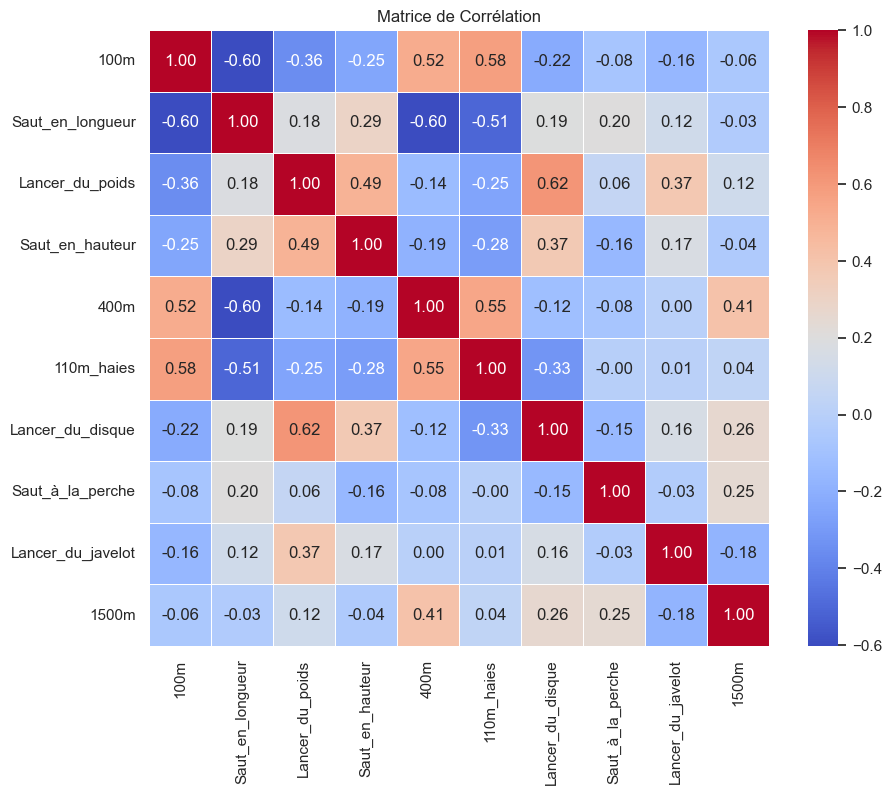

In [8]:
# Calcul de la matrice de corrélation
actif = decathlon[decathlon.columns[:10]]
correlation_matrix = actif.corr()

# Création d'un heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matrice de Corrélation')
plt.show()


le coefficient de correlation entre 100m et saut en longeur est -0.59 cela suggere une correlation negative modere entre ces deux epreuves
entre 100 et 500 il ya une correlation positive moderé de 0.5 
il ya une depandance entre les variables 


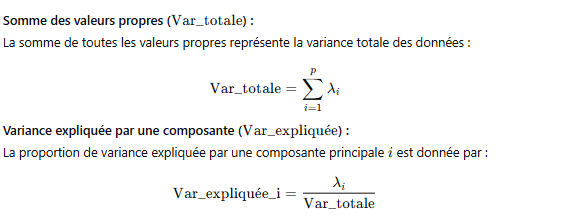


In [9]:
# Afficher les valeurs propres
print("Valeurs propres :")
print(pca.explained_variance_)

Valeurs propres :
[3.35370318 1.7805593  1.4400396  1.08327161 0.70189287 0.6142504
 0.46251615 0.4067985  0.22018522 0.18678317]


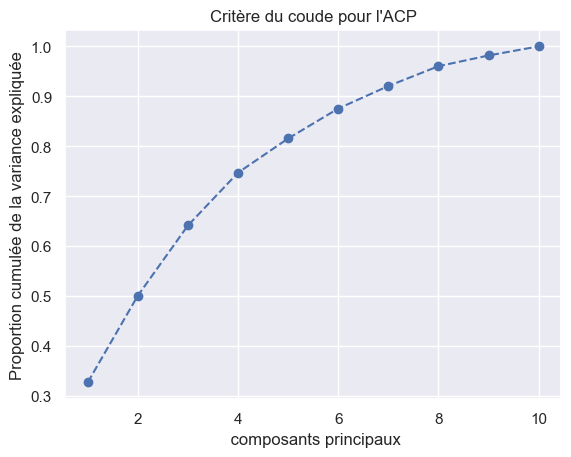

In [10]:
explained_variance = pca.explained_variance_ratio_
# Tracer la proportion cumulée de la variance expliquée
cumulative_var_explained = np.cumsum(explained_variance)
plt.plot(range(1, len(explained_variance) + 1), cumulative_var_explained, marker='o', linestyle='--')
plt.xlabel(' composants principaux')
plt.ylabel('Proportion cumulée de la variance expliquée')
plt.title('Critère du coude pour l\'ACP')
plt.show()

In [11]:
# Choisissez le nombre de composantes pour atteindre 60% de variance expliquée
n_components = np.argmax(cumulative_var_explained >= 0.64) + 1

n_components

3

In [12]:
# Charges factorielles
loadings = pd.DataFrame(pca.components_.T, columns=[f'Loading_PC{i}' for i in range(1, pca.n_components_ + 1)], index=actif.columns)

# DataFrame des résultats de l'ACP
df_pca_result = pd.DataFrame(res_pca, columns=[f'PC{i}' for i in range(1, 11)])


# Afficher les charges factorielles
print("\nCharges Factorielles:")
loadings



Charges Factorielles:


,Loading_PC1,Loading_PC2,Loading_PC3,Loading_PC4,Loading_PC5,Loading_PC6,Loading_PC7,Loading_PC8,Loading_PC9,Loading_PC10
100m,-0.428296,0.141989,-0.155580,-0.036787,-0.365187,0.296077,-0.381776,-0.461602,0.104758,0.424283
Saut_en_longueur,0.410152,-0.262079,0.153727,0.099010,-0.044323,-0.306125,-0.627693,0.021012,0.482669,0.081044
Lancer_du_poids,0.344144,0.453947,-0.019724,0.185395,-0.134320,0.305473,0.309725,0.313930,0.427291,0.390284
Saut_en_hauteur,0.316194,0.265776,-0.218943,-0.131897,-0.671218,-0.467771,0.091450,-0.125092,-0.243661,-0.106427
400m,-0.375716,0.432046,0.110918,0.028503,0.105970,-0.332522,0.124421,-0.213398,0.552129,-0.413995
110m_haies,-0.412554,0.173591,-0.078156,0.282901,-0.198573,-0.099638,-0.357330,0.711114,-0.150134,-0.090864
Lancer_du_disque,0.305426,0.460024,0.036238,-0.252591,0.126678,0.449373,-0.429890,-0.038390,-0.154807,-0.449166
Saut_à_la_perche,0.027831,-0.136841,0.583617,0.536495,-0.398737,0.261665,0.097960,-0.178038,-0.082978,-0.276451
Lancer_du_javelot,0.153198,0.240507,-0.328742,0.692855,0.368731,-0.163203,-0.106745,-0.296142,-0.247327,0.087773
1500m,-0.032107,0.359805,0.659874,-0.156696,0.185571,-0.298269,-0.083629,-0.013717,-0.307734,0.429231



Les charges factorielles sont les coefficients qui mesurent la relation entre les variables originales et les composantes principales dans l'analyse en composantes principales (ACP). Ces charges représentent l'amplitude et la direction de la contribution de chaque variable à chaque composante principale.
Plus précisément,
 si X est la matrice des données originales centrées (chaque variable ayant une moyenne nulle), et 
F est la matrice des composantes principales, alors la matrice des charges factorielles: L=(transpose) X *F

Voici une interprétation générale des charges factorielles :

Pour la variable "100m", elle a une charge négative élevée sur la composante principale 1 (PC1). Cela suggère que des performances élevées dans l'épreuve de 100m sont associées à des valeurs plus faibles sur PC1.

Pour la variable "Saut_en_longueur", elle a une charge positive élevée sur PC1, suggérant que de bonnes performances dans cette épreuve sont associées à des valeurs plus élevées sur PC1.

La variable "Lancer_du_poids" a des charges élevées sur plusieurs composantes principales, indiquant son importance dans plusieurs aspects de la variation.


In [13]:
import numpy as np

# Supposons que res_pca est votre matrice de composantes principales
trois_premieres_composantes = res_pca[:, :3]

# Calculer la matrice de corrélation
correlation_matrix_trois_premieres_composantes = np.corrcoef(trois_premieres_composantes, rowvar=False)

# Afficher la matrice de corrélation
print("Matrice de corrélation entre les trois premières composantes principales:")
print(correlation_matrix_trois_premieres_composantes)

# Extraire le coefficient de corrélation entre comp1, comp2, et comp3
correlation_comp1_comp2_comp3 = correlation_matrix_trois_premieres_composantes[0, 1]



Matrice de corrélation entre les trois premières composantes principales:
[[ 1.00000000e+00 -2.52909511e-17  8.43053312e-17]
 [-2.52909511e-17  1.00000000e+00  6.43284922e-16]
 [ 8.43053312e-17  6.43284922e-16  1.00000000e+00]]


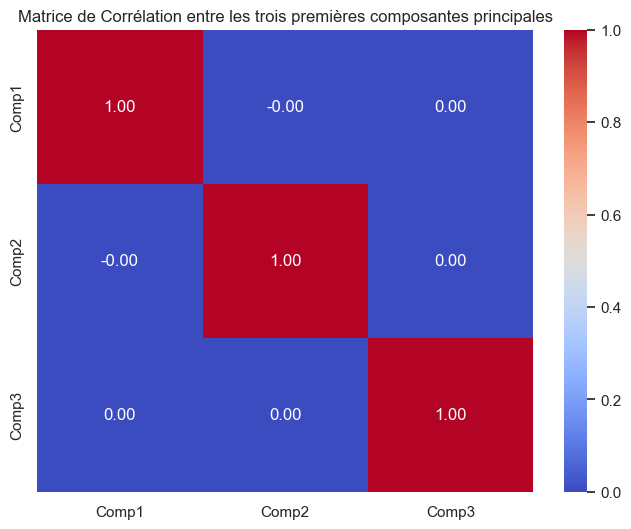

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Afficher la matrice de corrélation graphiquement
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_trois_premieres_composantes, annot=True, cmap='coolwarm', fmt=".2f", xticklabels=['Comp1', 'Comp2', 'Comp3'],
            yticklabels=['Comp1', 'Comp2', 'Comp3'])
plt.title('Matrice de Corrélation entre les trois premières composantes principales')
plt.show()


 La non-corrélation entre les composantes principales implique également leur indépendance. Cela signifie que l'information contenue dans chaque composante est distincte et non redondante. L'indépendance des composantes rend l'ACP utile pour réduire la dimensionnalité des données tout en conservant l'information importante 
 dans notre cas il est bien claire que la correlation entre les 3 composantes est presque nulle ce qui veut qu'on est dans le  bon chemin.

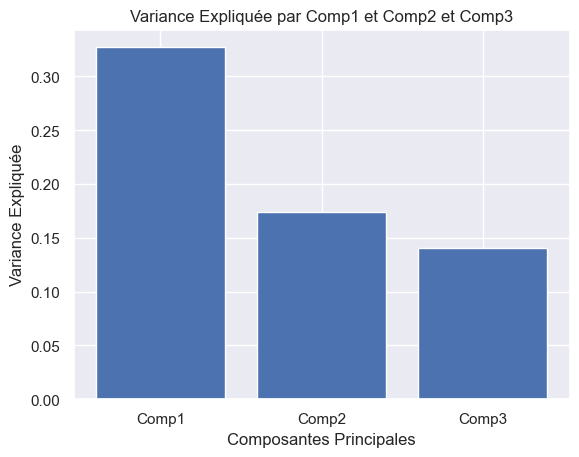

In [15]:
#visualisation  du pourcentage de variance explique pour les deux composantes
import matplotlib.pyplot as plt

# Calculer la variance expliquée par comp1 et comp2
variance_explained = pca.explained_variance_ratio_

# Créer un graphique à barres
plt.bar(['Comp1', 'Comp2','Comp3'], variance_explained[:3])
plt.xlabel('Composantes Principales')
plt.ylabel('Variance Expliquée')
plt.title('Variance Expliquée par Comp1 et Comp2 et Comp3')
plt.show()
#on observe que la premiere composant explique la majorite de l'information

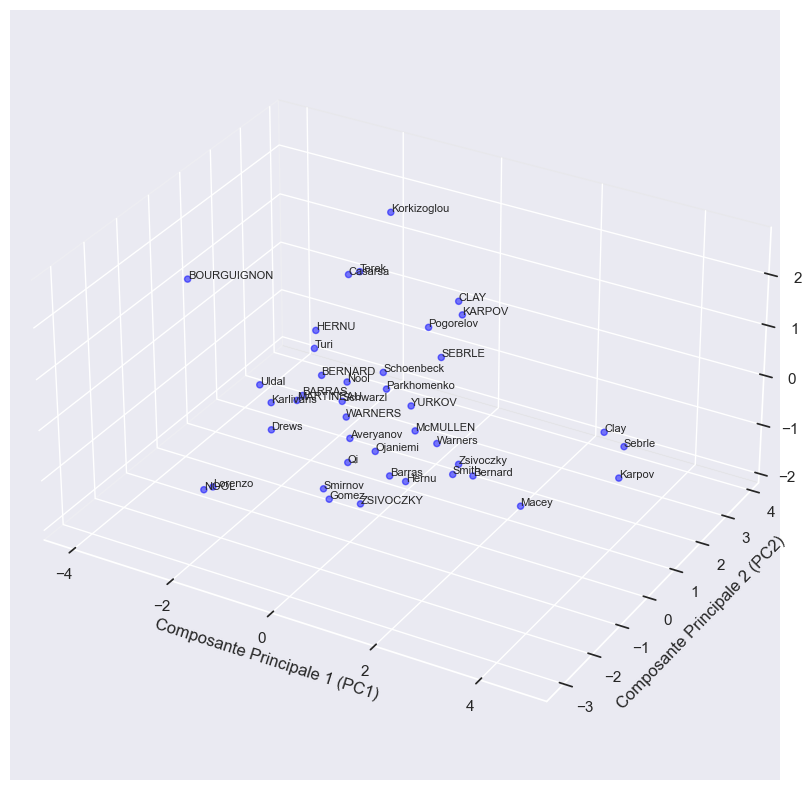

In [16]:
# Supposons que res_pca est votre matrice de composantes principales
trois_premieres_composantes = res_pca[:, :3]
# Calculer les moyennes des trois premières composantes principales
mean_pc1 = res_pca[:, 0].mean()
mean_pc2 = res_pca[:, 1].mean()
mean_pc3 = res_pca[:, 2].mean()
# Ajuster les coordonnées pour centrer par rapport à l'origine (0, 0, 0)
centered_res_pca = res_pca[:, :3] - np.array([mean_pc1, mean_pc2, mean_pc3])
# Création d'une carte des individus centrée sur l'origine en 3D
plt.figure(figsize=(12, 10))
ax = plt.axes(projection='3d')  # Utiliser une projection 3D pour afficher les trois composantes principales
# Scatter plot en 3D
ax.scatter3D(centered_res_pca[:, 0], centered_res_pca[:, 1], centered_res_pca[:, 2], c='blue', alpha=0.5)
# Ajouter des étiquettes (par exemple, les noms des individus)
for i, txt in enumerate(actif.index):
    ax.text(centered_res_pca[i, 0], centered_res_pca[i, 1], centered_res_pca[i, 2], txt, fontsize=8)
# Ajouter des labels pour les axes
ax.set_xlabel('Composante Principale 1 (PC1)', fontsize=12)
ax.set_ylabel('Composante Principale 2 (PC2)', fontsize=12)
ax.set_zlabel('Composante Principale 3 (PC3)', fontsize=12)
# Ajuster la taille de la boîte pour agrandir la figure
ax.set_box_aspect([np.ptp(centered_res_pca[:, 0]), np.ptp(centered_res_pca[:, 1]), np.ptp(centered_res_pca[:, 2])])
# Ajuster l'épaisseur des lignes pour une meilleure lisibilité
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
ax.zaxis.pane.set_edgecolor('k')  # Couleur de la ligne des bords de l'axe z
ax.zaxis.pane.set_linewidth(0.02)  # Épaisseur des lignes des bords de l'axe z
# Sauvegarder la figure au format PNG avec un ajustement des marges
plt.savefig('carte_des_individus_3D.png', bbox_inches='tight')
# Afficher la figure
plt.show()




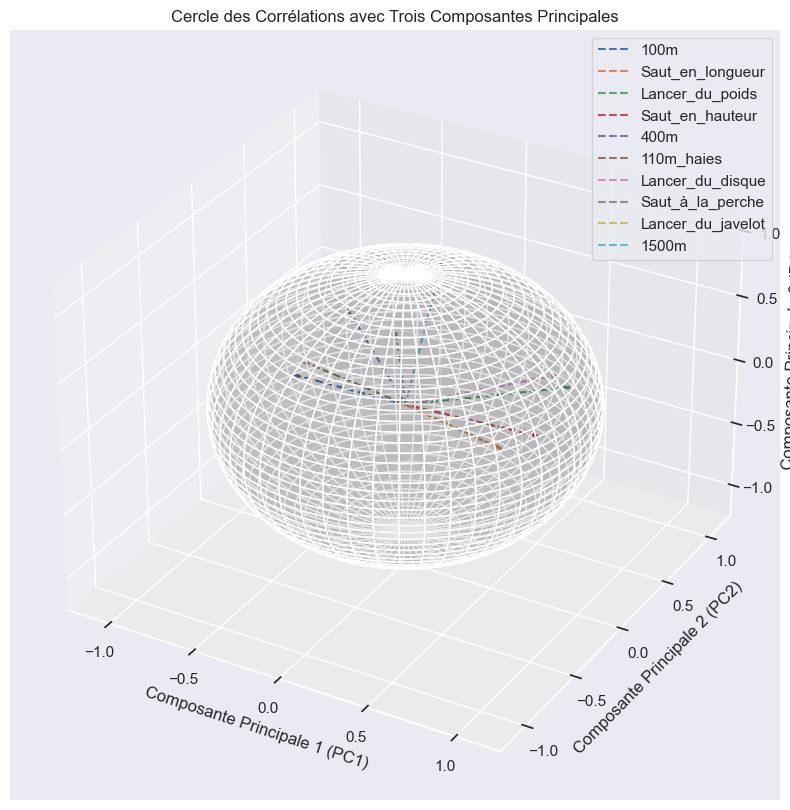

In [17]:
#  res_pca est la matrice de composantes principales
#  actif est le tableau de données avec les variables originales
# (vous pouvez également utiliser les trois premières composantes principales si vous le souhaitez)
trois_premieres_composantes = res_pca[:, :3]
#  les coefficients de corrélation entre les variables originales et les trois premières composantes principales
corr_original_components = np.corrcoef(actif, trois_premieres_composantes, rowvar=False)[:10, 10:]
# Creation d'une figure 3D
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
# Cration  de cercle des corrélations
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
x = np.outer(np.cos(u), np.sin(v))
y = np.outer(np.sin(u), np.sin(v))
z = np.outer(np.ones(np.size(u)), np.cos(v))
ax.plot_surface(x, y, z, color='black', alpha=0.1)
# Ajouter les flèches représentant les variables originales
for i, (var, color) in enumerate(zip(actif.columns, sns.color_palette())):
    ax.quiver(0, 0, 0, corr_original_components[i, 0], corr_original_components[i, 1], corr_original_components[i, 2],
              color=color, arrow_length_ratio=0.05, linestyle='dashed', label=var)
# Ajouter les axes x, y et z
ax.set_xlabel('Composante Principale 1 (PC1)')
ax.set_ylabel('Composante Principale 2 (PC2)')
ax.set_zlabel('Composante Principale 3 (PC3)')
# Ajuster les limites de l'axe pour que le cercle soit bien visible
ax.set_xlim(-1.2, 1.2)
ax.set_ylim(-1.2, 1.2)
ax.set_zlim(-1.2, 1.2)
# Afficher la figure
plt.title('Cercle des Corrélations avec Trois Composantes Principales')
plt.legend()
plt.show()





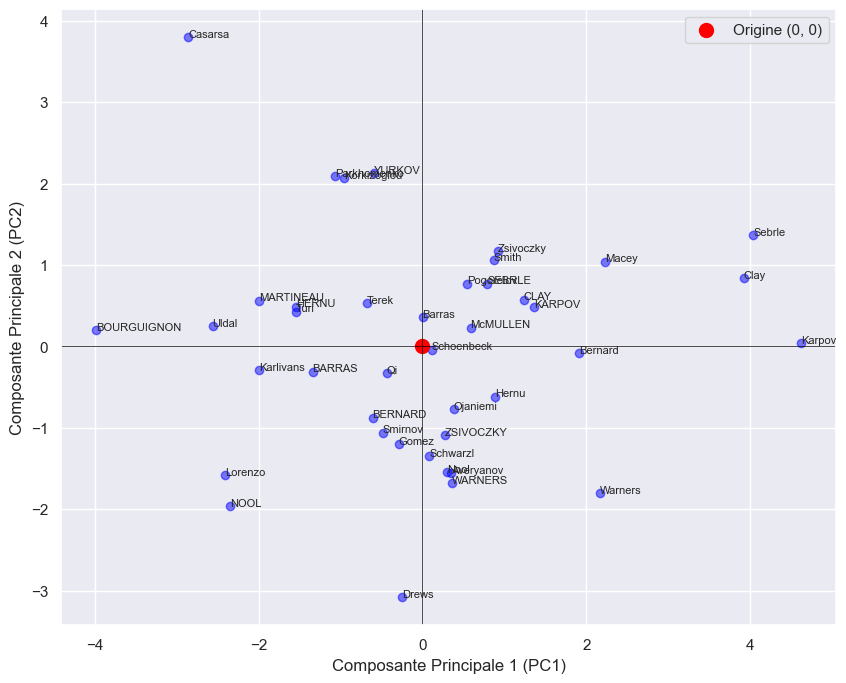

In [18]:
# Supposons que res_pca est votre matrice de composantes principales
# Supposons que actif est votre tableau de données avec les variables originales

# Calculer les moyennes des deux premières composantes principales
mean_pc1 = res_pca[:, 0].mean()
mean_pc2 = res_pca[:, 1].mean()

# Ajuster les coordonnées pour centrer par rapport à l'origine (0, 0)
centered_res_pca = res_pca[:, :2] - np.array([mean_pc1, mean_pc2])

# Création d'une carte des individus centrée sur l'origine
plt.figure(figsize=(10, 8))
plt.scatter(centered_res_pca[:, 0], centered_res_pca[:, 1], c='blue', alpha=0.5)

# Ajouter des étiquettes (par exemple, les noms des individus)
for i, txt in enumerate(actif.index):
    plt.annotate(txt, (centered_res_pca[i, 0], centered_res_pca[i, 1]), fontsize=8)

# Ajouter une ligne pour représenter l'axe x
plt.axhline(0, color='black', linewidth=0.5)

# Ajouter une ligne pour représenter l'axe y
plt.axvline(0, color='black', linewidth=0.5)

# Centrer l'origine sur (0, 0)
plt.scatter(0, 0, c='red', marker='o', s=100, label='Origine (0, 0)')

# Ajouter des labels pour les axes
plt.xlabel('Composante Principale 1 (PC1)')
plt.ylabel('Composante Principale 2 (PC2)')

# Afficher la légende et la figure
plt.legend()
plt.show()


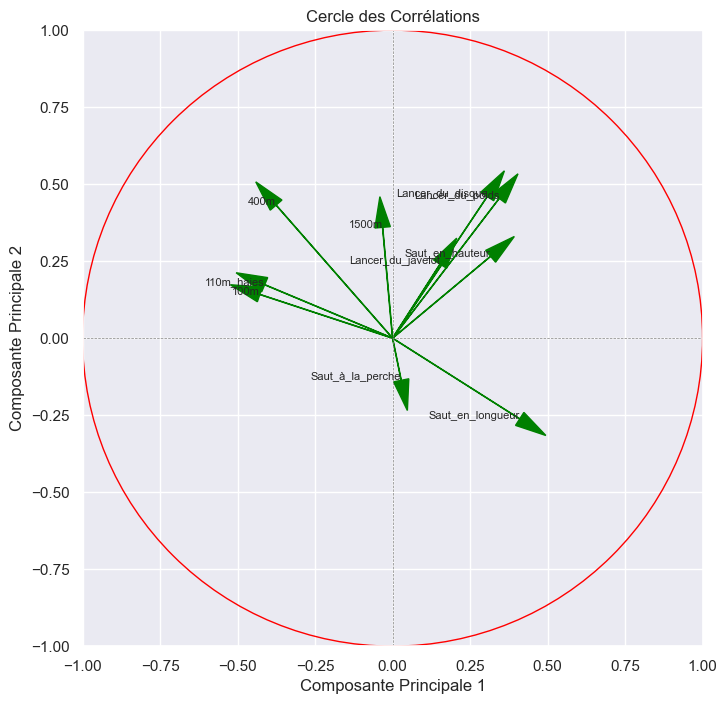

In [19]:
# Calculer les vecteurs propres des composantes principales
vecteurs_propres = pca.components_.T

# Initialiser la figure
fig, ax = plt.subplots(figsize=(8, 8))

# Tracer les cercles
for i, (comp1, comp2) in enumerate(zip(vecteurs_propres[:, 0], vecteurs_propres[:, 1])):
    ax.arrow(0, 0, comp1, comp2, head_width=0.05, head_length=0.1, fc='green', ec='green')  # Modifier la couleur ici
    ax.text(comp1, comp2, actif.columns[i], fontsize=8, ha='right')

# Ajouter des axes
ax.axhline(0, color='gray', linestyle='--', linewidth=0.5)
ax.axvline(0, color='gray', linestyle='--', linewidth=0.5)

# Limiter les axes
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)

# Ajouter un cercle
cercle = plt.Circle((0, 0), 1, edgecolor='red', facecolor='none')  # Modifier la couleur ici
ax.add_patch(cercle)

# Étiqueter les axes
ax.set_xlabel('Composante Principale 1')
ax.set_ylabel('Composante Principale 2')

plt.title('Cercle des Corrélations')
plt.grid(True)
plt.show()